In [1]:
import cv2
import os

def save_all_frames(video_path, dir_path, basename, ext='jpg'):
    cap=cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print('wrong')
    else:
        print('good')

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))/30)))
    frames=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    n = 0
    while True:
        ret, frame = cap.read()
        if ret and n%30==0:
            cv2.imwrite('{}_{}.{}'.format(base_path, str(int(n/30)).zfill(digit), ext), frame)
        if n>frames:
            break
        n+=1

save_all_frames('/content/1-3.mp4', '/content/image_wrong/', 'Wrong_1-3', 'png')

wrong


In [3]:
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt

# filename="wrong_imgs-126.png"#ここにファイルネームを入れる
# im=Image.open(filename)
# ar=np.array(im)

# #以下はジャッジ関数
# def judge_green(i,j):
# 	R=int(ar[i][j][0])
# 	G=int(ar[i][j][1])
# 	B=int(ar[i][j][2])
# 	return G>=R*2 and G>=B

# def Hair_top(ar, h, w):
#     hair=[137,106,55]
#     hi=hj=-1
#     f=0
#     for i in range(h):
#         cnt=0
#         for j in range(w):
#             p=0
#             for k in range(3):
#                 p+=abs(ar[i][j][k]-hair[k])
#             if p<=40:
#                 cnt+=1
#             else:
#                 cnt=0

#             if cnt>=10:
#                 hi=i;hj=j-5
#                 f=1
#                 break
#         if f==1:
#             break
#     return (hi,hj)

# def Hair_LeftRight(ar, h, w):
# 	ht=Hair_top(ar, h, w)
# 	hair=[137,106,55]
# 	hl=-1
# 	f=0
# 	for j in range(ht[1]-150,ht[1]):
# 		cnt=0
# 		for i in range(ht[0],h):
# 			p=0
# 			for k in range(3):
# 				p+=abs(ar[i][j][k]-hair[k])
# 			if p<=40:
# 				cnt+=1
# 			else:
# 				cnt=0
# 			if cnt>=60:
# 				hl=j-5
# 				f=1
# 				break
# 		if f==1:
# 			break
# 	hr=-1
# 	f=0
# 	for j in range(min(1279, ht[1]+150),ht[1],-1):
# 		cnt=0
# 		for i in range(ht[0],h):
# 			p=0
# 			for k in range(3):
# 				p+=abs(ar[i][j][k]-hair[k])
# 			if p<=40:
# 				cnt+=1
# 			else:
# 				cnt=0
# 			if cnt>=60:
# 				hr=j-5
# 				f=1
# 				break
# 		if f==1:
# 			break
# 	return (hl,hr)	

# def Left_Eye(ar, h, w):
# 	ht=Hair_top(ar, h, w)
# 	f=0
# 	ei=ej=-1;
# 	for i in range(ht[0]+70,ht[0]+200):
# 		cnt=0
# 		for j in range(ht[1]-150,ht[1]-50):
# 			if judge_green(i,j):
# 				cnt+=1
# 			else:
# 				cnt=0
# 			if cnt>=5:
# 				ei=i+10;ej=j
# 				f=1
# 				break
# 		if f==1:
# 			break
# 	if f==0:
# 		for i in range(ht[0]+70,ht[0]+200):
# 			cnt=0
# 			for j in range(ht[1]-50,ht[1]):
# 				if judge_green(i,j):
# 					cnt+=1
# 				else:
# 					cnt=0
# 				if cnt>=5:
# 					ei=i+10;ej=j
# 					f=1
# 					break
# 			if f==1:
# 				break
# 	if f==0:
# 		for i in range(ht[0]+70,ht[0]+200):
# 			cnt=0
# 			for j in range(ht[1],ht[1]+50):
# 				if judge_green(i,j):
# 					cnt+=1
# 				else:
# 					cnt=0
# 				if cnt>=5:
# 					ei=i+10;ej=j
# 					f=1
# 					break
# 			if f==1:
# 				break
# 	return (ei,ej)

# def Right_Eye(ar, h, w):
# 	ht=Hair_top(ar, h, w)
# 	f=0
# 	ei=ej=-1
# 	for i in range(ht[0]+70,ht[0]+200):
# 		cnt=0
# 		for j in range(min(1279, ht[1]+98),ht[1]+50,-1):  
# 			if judge_green(i,j):
# 				cnt+=1
# 			else:
# 				cnt=0
# 			if cnt>=5:
# 				ei=i+10;ej=j
# 				f=1
# 				break
# 		if f==1:
# 			break
# 	if f==0:
# 		for i in range(ht[0]+70,ht[0]+200):
# 			cnt=0
# 			for j in range(ht[1]+50,ht[1],-1):
# 				if judge_green(i,j):
# 					cnt+=1
# 				else:
# 					cnt=0
# 				if cnt>=5:
# 					ei=i+10;ej=j
# 					f=1
# 					break
# 			if f==1:
# 				break
# 	if f==0:
# 		for i in range(ht[0]+70,ht[0]+200):
# 			cnt=0
# 			for j in range(ht[1],ht[1]-50,-1):
# 				if judge_green(i,j):
# 					cnt+=1
# 				else:
# 					cnt=0
# 				if cnt>=5:
# 					ei=i+10;ej=j
# 					f=1
# 					break
# 			if f==1:
# 				break
# 	return (ei,ej)

# def Mouse(ar, h, w):
# 	mouse=[203,102,113]
# 	ht=Hair_top(ar, h, w)
# 	f=0
# 	mi=mj=-1;
# 	for i in range(ht[0]+150,ht[0]+250):
# 		cnt=0
# 		for j in range(ht[1]-100, min(1279, ht[1]+100)):       
# 			p=0
# 			for k in range(3):
# 				p+=abs(ar[i][j][k]-mouse[k])
# 			if p<=40:
# 				cnt+=1
# 			else:
# 				cnt=0
# 			if cnt>=5:
# 				mi=i+5;mj=j-5
# 				f=1
# 				break
# 		if f==1:
# 			break
# 	return (mi,mj)	

# def paint(x,y, ar):
# 	for i in range(-2,3):
# 		for j in range(-2,3):
# 			ar[x+i][y+j]=[0,255,0]

# #hair_LEftRightは(x_Left,x_Right)
# #それ以外は(x,y)が返り値である
# #該当するものがない場合-1を返す

# def all_paint(ar):
#     h=len(ar)
#     w=len(ar[0])
#     a=Hair_top(ar, h, w)
#     b=Hair_LeftRight(ar, h, w)
#     c=Left_Eye(ar, h, w)
#     d=Right_Eye(ar, h, w)
#     e=Mouse(ar, h, w)
#     ht=Hair_top(ar, h, w)

#     print(a,b,c,d,e)

#     if a[0]!=-1 and a[1]!=-1:
#         paint(a[0],a[1], ar)
#         if c[0]!=-1 and c[1]!=-1:
#             paint(c[0],c[1], ar)
#         if d[0]!=-1 and d[1]!=-1:
#             paint(d[0],d[1], ar)
#         if e[0]!=-1 and e[1]!=-1:
#             paint(e[0],e[1], ar)
#         if b[0]!=-1 and b[1]!=-1:
#             for i in range(ht[0],ht[0]+100):
#                 paint(i,b[0], ar)
#                 paint(i,b[1], ar)

# print(ar.shape)

(720, 1280, 3)


1


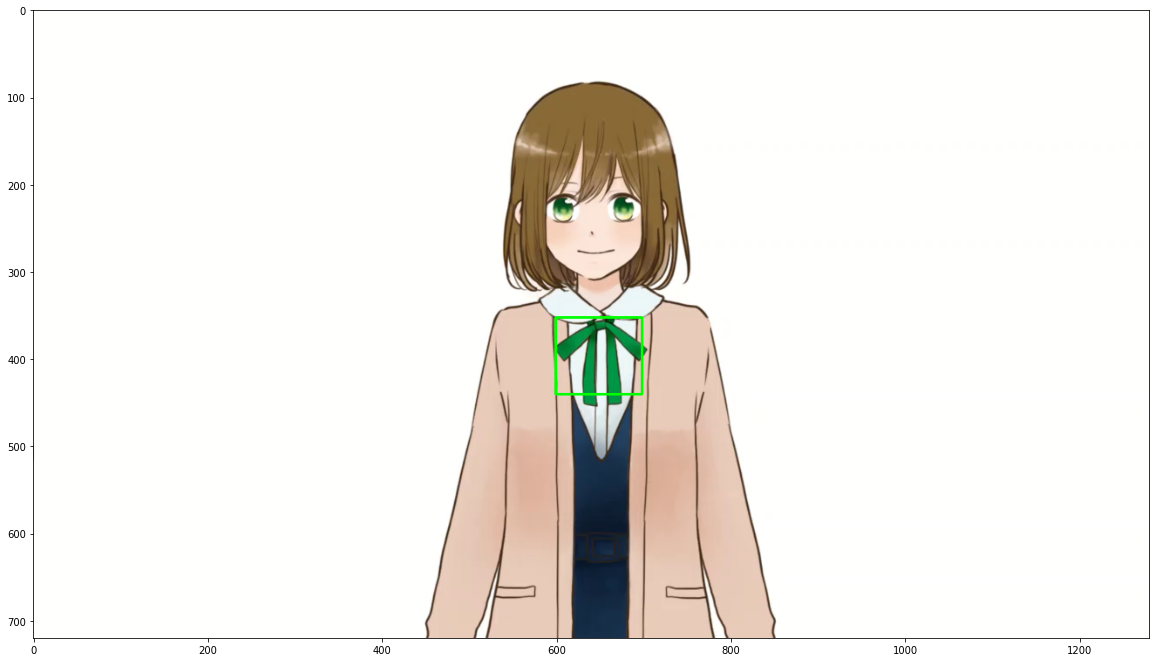

2


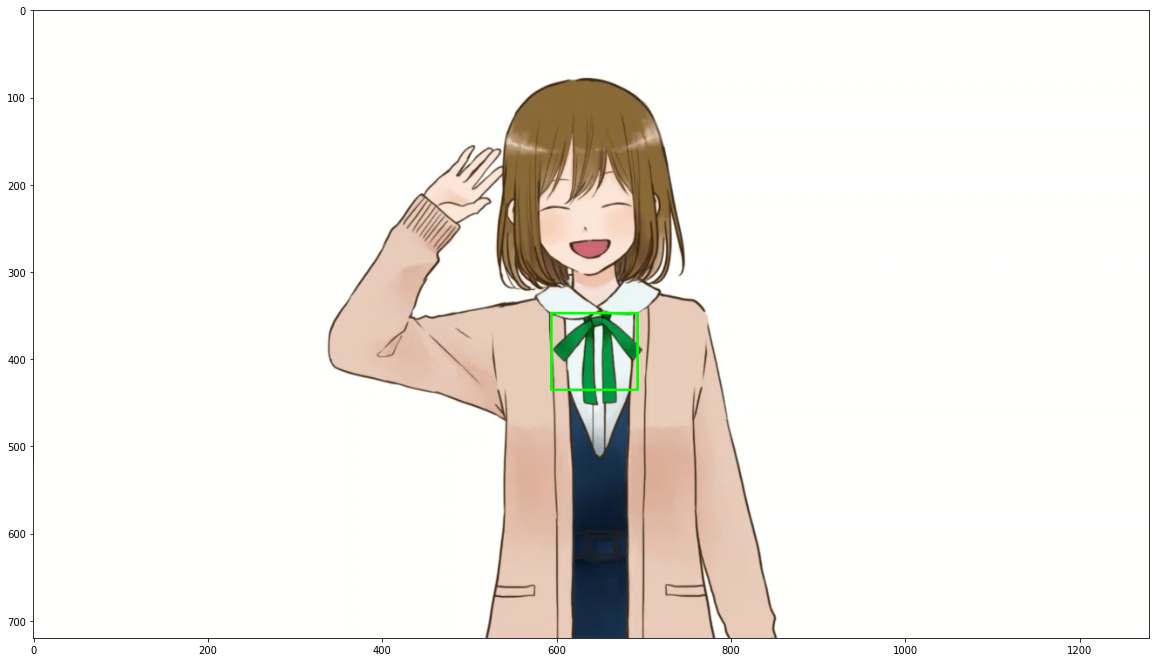

3


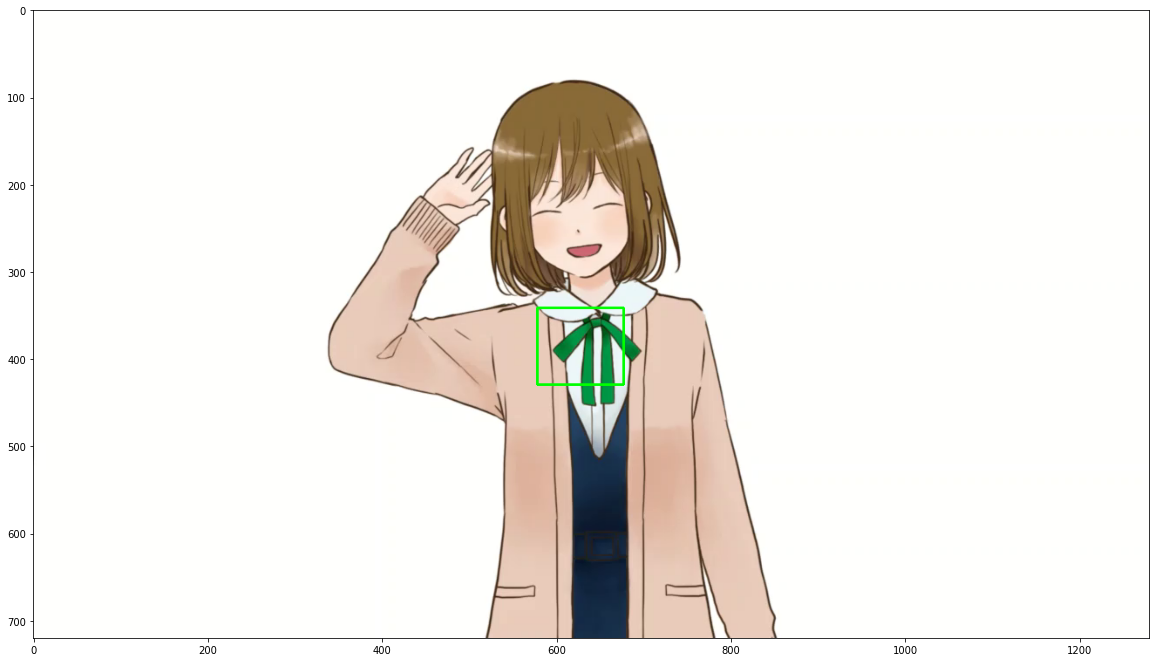

4


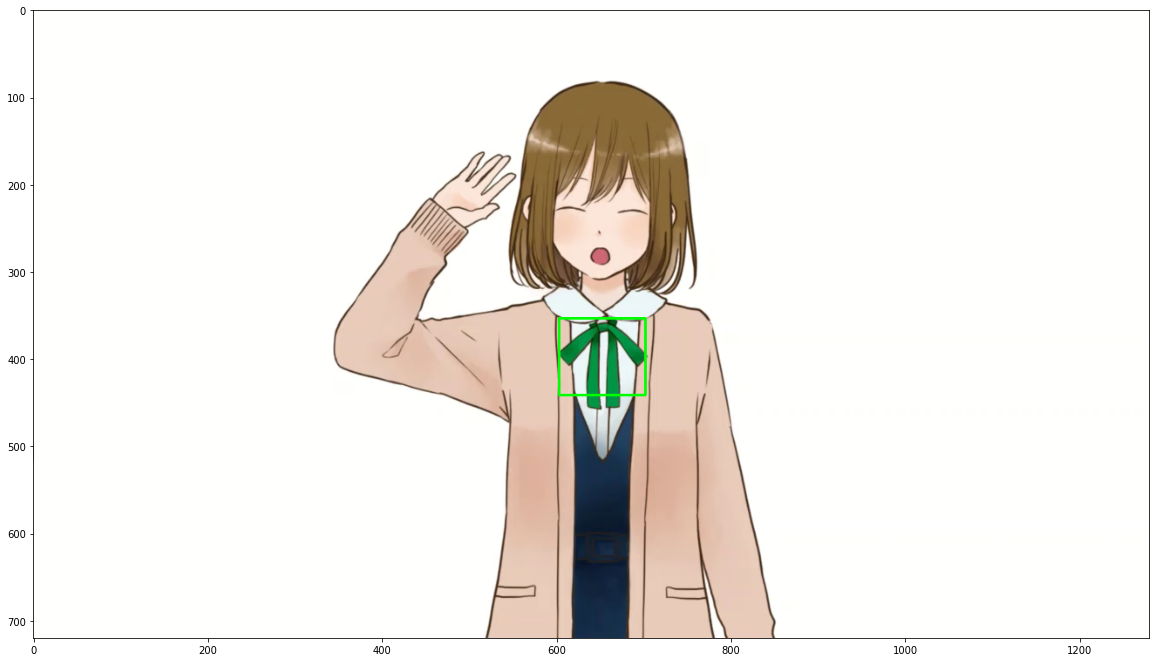

5


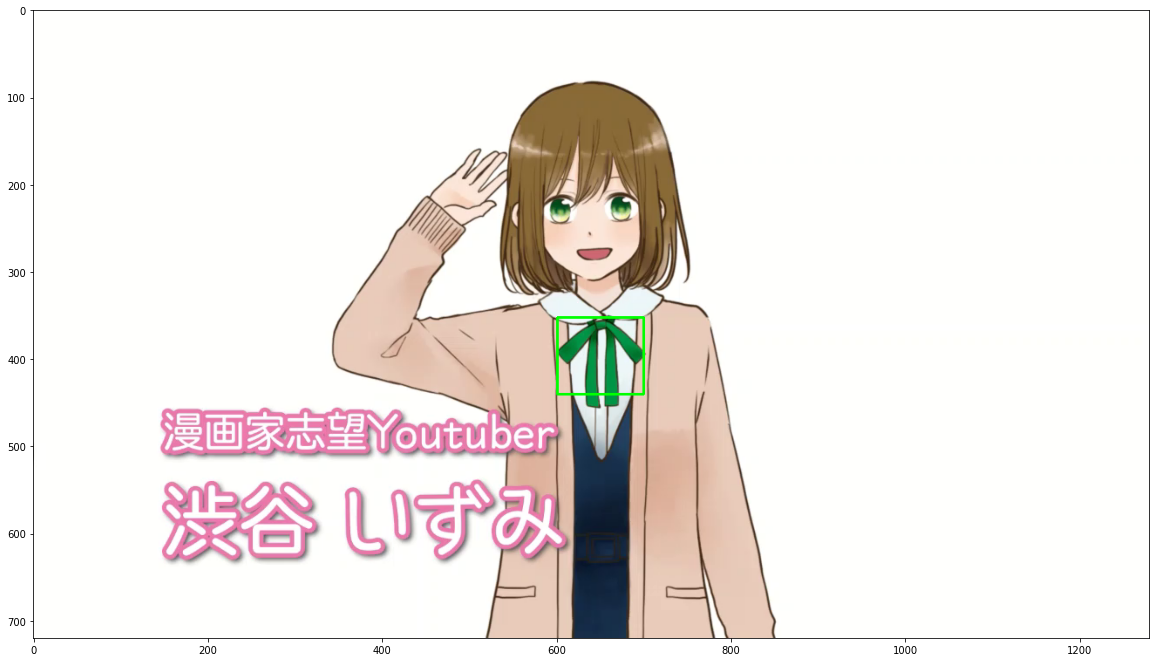

6


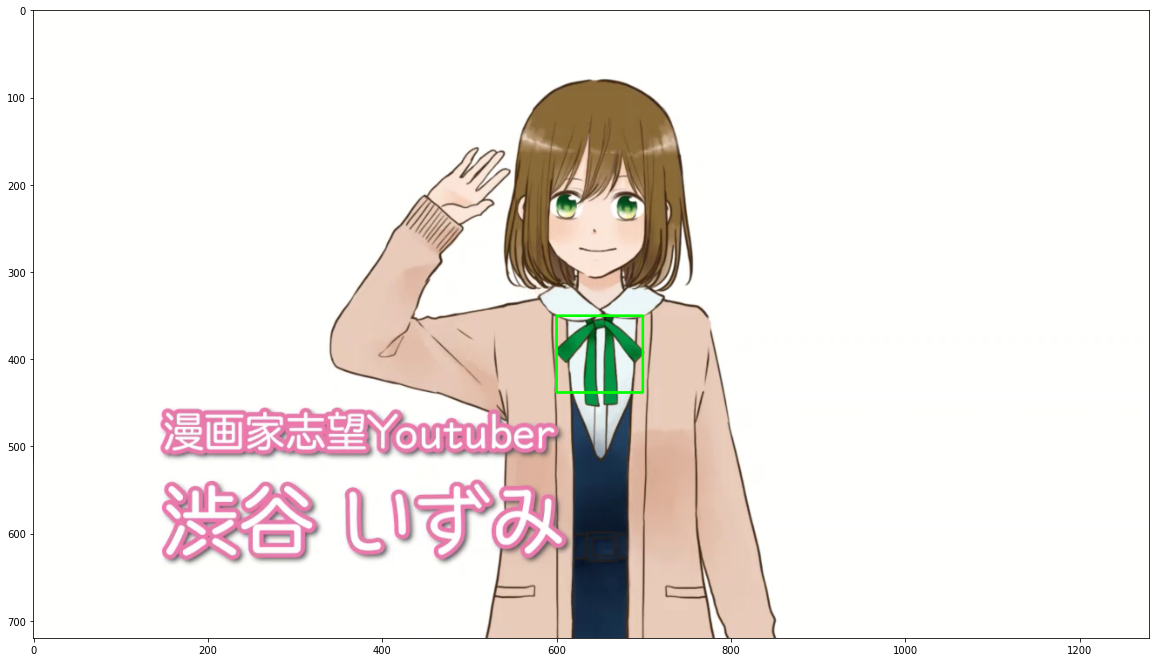

7


KeyboardInterrupt: ignored

In [143]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from PIL import Image

font = cv2.FONT_HERSHEY_PLAIN

# cap=cv2.VideoCapture('1-2.mp4')
# if not cap.isOpened:
#     print('wrong')
# else:
#     print('good')


# fmt = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
# fps = cap.get(cv2.CAP_PROP_FPS)
# size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
# writer = cv2.VideoWriter('outtest.mp4', fmt, fps, size)

temp = []
# for i in range(21):
#     temp.append(cv2.imread('Temp'+str(i+1)+'.png'))

# temp=sorted(temp, key=lambda x: np.shape(x)[0])
# for i in range(len(temp)):
#     print('temp['+str(i)+']:   '+ str(temp[i].shape))

for i in range(5):
    temp.append(cv2.imread('new_temp_'+str(i+1)+'.png'))
# for i in range(len(temp)):
#     print(temp[i].shape)

# 服の色がindex0, 白がindex1
cols=[[233, 203, 186],[235, 248, 247], [105, 75, 58]]

for num in range(1, 250):
    print(num)
    # img=cv2.imread('wrong_imgs-'+str(num)+'.png')
    img=Image.open('wrong_imgs-'+str(num)+'.png')
    img=np.array(img)

    # all_paint(img)

    can_use=np.zeros((1,3))
    for i in range(len(temp)):
        h, w, _ = temp[i].shape
        res = cv2.matchTemplate(img,temp[i],cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # cv2.rectangle(img, max_loc, (max_loc[0]+w, max_loc[1]+h), (255, 0, 0), 2)
        # cv2.putText(img, str(i+1), (max_loc[0], max_loc[1]-10), font, 1, (0, 255, 0), 1, cv2.LINE_AA)

        passed=True
        for H in range(3):
            new_col=[]
            new_cnt=np.zeros(100)
            cols_cnt=np.zeros(len(cols))
            for k in range(max_loc[0], max_loc[0]+w):
                color=img[max_loc[1]+h-H-2][k].astype('int64')
                different=True
                for a in range(len(cols)):
                    cc=0
                    for b in range(3):
                        cc+=abs(color[b]-cols[a][b])
                    if cc<=35:                                         # 40にしていた
                        cols_cnt[a]+=1
                        different=False
                if different:
                    diff=True
                    for a in range(len(new_col)):
                        count=0
                        for b in range(3):
                            count+=abs(color[b]-new_col[a][b])
                        if count<=50:
                            diff=False
                            new_cnt[a]+=1        
                    if diff:
                        new_col.append(color)
                        new_cnt[len(new_col)]+=1
            bluenum=0
            blue=[30, 59, 85]

            for c in range(len(new_col)):
                col_diff=0
                for k in range(3):
                    col_diff+=abs(new_col[c][k]-blue[k])
                if col_diff<=40:
                    bluenum=max(bluenum, new_cnt[c])

            new_cnt=np.sort(new_cnt)[::-1]
            if new_cnt[0]<10 or cols_cnt[0]<15 or cols_cnt[1]<15 or bluenum>10:       # 10 15 15
                passed=False
                break
        if passed:
            can_use=np.vstack([can_use, np.array([max_loc[0]+w, max_loc[1]+h, i])])

    can_use=can_use[np.argsort(can_use[:, 1])[::-1]].astype('uint16')
    can_use=np.delete(can_use, len(can_use)-1, 0)


    for j in range(min(len(can_use), 1)):       #もともと 100
        x=int(can_use[j][0])
        y=int(can_use[j][1])
        i=int(can_use[j][2])
        h, w, _=temp[i].shape

        beg_x=x-int(w/13*9)
        beg_y=y-int(h/35*9)
        fin_x=x-int(w/13*4)
        fin_y=y

        height=int((beg_y+fin_y)/2)
        new_col={}
        for yoko in range(beg_x, fin_x):
            cnt=0
            color=img[height][yoko].astype('int16')
            for k in range(3):
                cnt+=255-img[height][yoko][k] 
            if cnt>=100:
                diff=True
                for col in new_col:
                    count=0
                    for b in range(3):
                        count+=abs(color[b]-col[b])
                    if count<=50:
                        diff=False
                        new_col[col]+=1        
                if diff:
                    new_col[tuple(color)]=1
        new_col=sorted(new_col.items(), key=lambda x: x[1], reverse=True)

        ok=False
        for index, col in enumerate(new_col):
            # if index>7: break
            cnt=0
            green=[3, 151, 68]
            for k in range(3):
                cnt+=abs(green[k]-col[0][k])
            if cnt<=60:
                ok=True
        if ok:
            cv2.rectangle(img, (beg_x, beg_y), (fin_x, fin_y), (0, 255, 0), 2)
        else:
            cv2.rectangle(img, (beg_x, beg_y), (fin_x, fin_y), (255, 0, 0), 2)
        
        # cv2.rectangle(img, (beg_x, beg_y), (fin_x, fin_y), (0, 255, 0), 2)
        # cv2.putText(img, str(i+1), (beg_x, beg_y-10), font, 1, [0, 255, 0], 1, cv2.LINE_AA)
        # cv2.putText(img, str(i+1), (x-w, y-h-10), font, 1, color, 1, cv2.LINE_AA)


    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.show()

    # writer.write(img)

# writer.release()
# cap.release()
# cv2.destroyAllWindows()

# [233 203 186]    服の色
# [235 248 247]    間の白の色

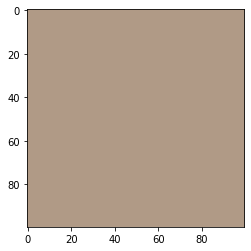

In [138]:
color=[176, 154, 134]
arr=np.full((100, 100, 3), color)

plt.imshow(arr)
plt.show()

In [98]:
dic={(255, 0, 0): 4}
print(dic[next(iter(dic))])

4
